In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
matplotlib.rcParams["font.serif"]
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby('area_type')['area_type'].agg('count') #alright.., this is just a little bit of tweaking alright

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
columns_to_drop = ['area_type', 'society', 'balcony', 'availability']

In [6]:
df2 = df.drop(columns = columns_to_drop)

In [7]:
df2.head()
#so we are going to use location, size, total_sqft, bath and price for our analysis

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
#let's check for missing values alright
df2.isna().any()

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
#alright.., let's get the percentage of null, values for each of them.., if it's significant, we fill, if not we drop

In [11]:
for i,v in enumerate(df2.isnull().sum()):
    if v != 0:
        print(df2.isnull().sum().index[i], '------', (v/df2.shape[0])*100, '%')

location ------ 0.0075075075075075074 %
size ------ 0.12012012012012012 %
bath ------ 0.5480480480480481 %


In [12]:
#alright.., we see that the percentage of null values is infinitesimal, so we can drop them

In [13]:
df3 = df2.dropna()

In [14]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
#how do i get the first values from the size column.., that's very important to get alright
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
#because of the inconsistency of the size
#some are in BHK, some are in RK and some are in bedroom, let's define a function to extract the number values from them

fn = lambda value: int(value.split()[0])

# df['size'].str.split()

In [17]:
df3['bhk'] = df3['size'].apply(fn)

In [18]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
#let's make sure we have what we need.., let's do a unique on the bhk column
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
#alright..., let's explore the total_sqft a little and understand some important concepts

df3['total_sqft'].dtype
#you know what dtype of O means.., it means it's an object

dtype('O')

In [21]:
df3.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [22]:
#but it has to be an integer or float.., let's try something that would result in an error:

try:
    df3.total_sqft.astype(int)
except Exception as e:
    print(type(e), e)

#so we have seen that, some things are really funny here.., let's do something

<class 'ValueError'> invalid literal for int() with base 10: '2100 - 2850'


In [23]:
x = '2100 - 2850'

In [24]:
def create_fn(x):
    if len(x.split()) == 3:
        return (float(x.split()[0]) + float(x.split()[-1]))/2

In [25]:
#alright.., let's do something to see if the values are true or not:

def is_float(x):
    try:
        float(x)
    except:
        return False
    else:
        return True

In [26]:
df3[~(df3.total_sqft.apply(is_float))].total_sqft.unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [27]:
#alright.., let's tackle the values on at a time.., for a range of that values.., let's use 1st value + last_value / 2

def fn_clean_range(x):
    if len(x.split('-')) == 2:
        return (float(x.split()[0]) + float(x.split()[-1]))/2
    try:
        return float(x)
    except:
        if x[-5:] == 'Meter': #removed the sq meter problem
            return float(x[:-9])
        elif x[-5:] == 'Perch': #removed the perch problem
            return float(x[:-5])
        elif x[-5:] == 'Yards':
            return float(x[:-9])
        elif x[-6:] == 'Guntha':
            return float(x[:-6])
        elif x[-5:] == 'Acres':
            return float(x[:-5])
        elif x[-5:] == 'Cents':
            return float(x[:-5])
        elif x[-7:] == 'Grounds':
            return float(x[:-7])
        return x

In [28]:
df4 = df3.copy(deep = True)

In [29]:
df4['total_sqft'] = df4['total_sqft'].transform(fn_clean_range)

In [30]:
df4.total_sqft = df4.total_sqft.astype('float64')

In [31]:
df4.shape

(13246, 6)

In [32]:
df4[df4.total_sqft.apply(is_float)].shape

(13246, 6)

In [33]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [34]:
#next up we want to create the price per sqft column.., but we have to get a new dataframe before we can incorporate this

df5 = df4.copy(deep = True)

In [35]:
df5.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [36]:
df5['price_per_sqft'] = round((df5['price']*100000)/df5['total_sqft'], 2)

In [37]:
df5.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56


In [38]:
len(df5.location.unique())

1304

In [39]:
#alright.., let's pay close attention to the grouping of each of the locations
#let's clean our location to remove any extra spaces we might encounter alright

df5.location = df5.location.map(lambda x: x.strip())


In [40]:
location_stats = df5.groupby('location')['location'].agg('count')

In [41]:
location_stats.sort_values(ascending = False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [42]:
#alright.., so we want to create a category called other such that if the columns have less than 10 data points we call it other

In [43]:
location_less_or_equal_10 = location_stats[location_stats <= 10]

In [44]:
df5.location = df5.location.map(lambda x: 'other' if x in location_less_or_equal_10 else x)

In [45]:
len(df5.location.unique())

242

In [46]:
#alright.., so we have created a different category called other to house all those values alright
#let's proceed to see the other aspects of the code okay...

df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


In [47]:
# OUTLIER DETECTION AND REMOVAL

In [48]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]

In [49]:
df6.shape

(12464, 7)

In [50]:
for a, b in df6.groupby('location'):
    print(a)
    print(b)
    print('\n\n--------------------------------------------')

1st Block Jayanagar
                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210          15017.54  
848          11901.84  
2152         12533.33  
2355         18750.00  
4991          6000.00  
7138         10833.33  
7358         11983.81  
7383  

In [51]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for name, subdf in df.groupby('location'):
        mean_psqft = subdf.price_per_sqft.mean()
        std_psqft = subdf.price_per_sqft.std()
        result = subdf[(subdf.price_per_sqft > (mean_psqft - std_psqft)) & (subdf.price_per_sqft <= (mean_psqft + std_psqft))]
        df_out = pd.concat([df_out, result], ignore_index= True)
    return df_out

In [52]:
df7 = remove_outliers(df6)

In [53]:
df7.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3445,Hulimavu,2 BHK,1300.0,2.0,36.00,2,2769.23
5399,Old Madras Road,3 BHK,2990.0,5.0,173.00,3,5785.95
1787,Devarachikkanahalli,2 BHK,1230.0,2.0,58.00,2,4715.45
8535,other,3 BHK,2100.0,3.0,75.00,3,3571.43
1556,Chandapura,1 BHK,645.0,1.0,16.45,1,2550.39


In [54]:
df7.shape

(10299, 7)

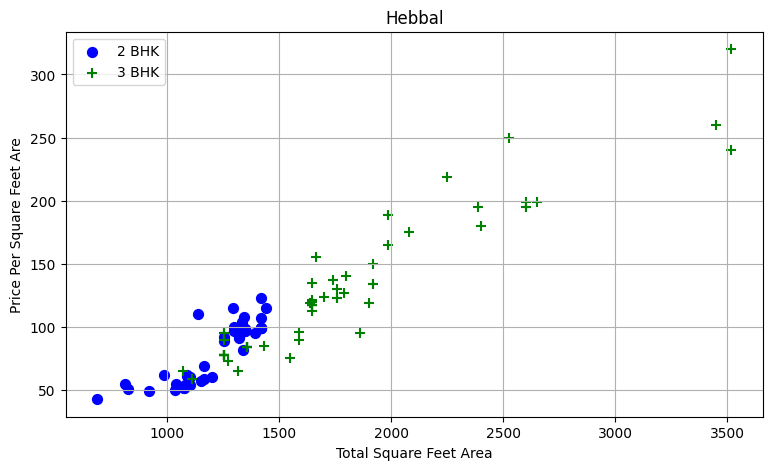

In [55]:
#alright.., so next up eh.., we want to see the scatter plot of sqft against price per sqft to examine some discrete relationships

def plot_scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)] 
    bhk3 = df[(df.location == location) & (df.bhk == 3)] 
    matplotlib.rcParams['figure.figsize'] = (9,5)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet Are')
    plt.title(location)
    plt.legend()
    plt.grid()
plt.show()
    
plot_scatter_plot(df7, 'Hebbal')

In [56]:
#alright.., so let's do an analysis.., that analyses 1 and 2 or 2 and 3 just like that




In [57]:
j = df7.groupby('bhk')['price_per_sqft'].mean().to_dict()
j

{1: 5179.550767754319,
 2: 5090.742340514536,
 3: 5952.796825751926,
 4: 7640.601813333334,
 5: 7585.320454545455,
 6: 7225.458225806451,
 7: 5638.7745,
 8: 5793.408125,
 9: 5371.7155555555555,
 10: 7337.12,
 11: 4850.0,
 13: 5069.12,
 16: 5500.0}

In [58]:
j = df7[df7.location == 'other'].groupby('bhk')['price_per_sqft'].mean().to_dict()
key_values = [i for i in j.keys()]
value_values = [i for i in j.values()]
excluded_values = np.array([])

for a, i in enumerate(key_values):
    if a != 0:
        excluded_values = np.append(excluded_values, df7[(df7.bhk == i)&(df7.price_per_sqft < value_values[a-1])].index.values)

In [59]:
#alright.., so basically what the code wants is for every location..,
#we get the values per bhk.., maybe 1 for hebbal.., then do all calculations for the 2nd value greater than the 
#statistics of the first value alright

def remove_outliers(df):
    excluded_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'): #at this point, goes through the each bhk value maybe 1 for each location, and get the stats
            stats = bhk_stats.get(bhk - 1) #at this point it gets the value before it and saves it here. so this is a dictionary of maybe 0,1,2
            if stats and stats['count'] > 5: #value of 0 is none, so it goes to the next iteration
                excluded_indices = np.append(excluded_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values) #compares current value with previous value
    return df.drop(excluded_indices, axis = 'index') #it returns the dataframe with the outliers indices excluded alright

In [60]:
df8 = remove_outliers(df7)

In [61]:
df8.shape #alright.., this is very nice

(7376, 7)

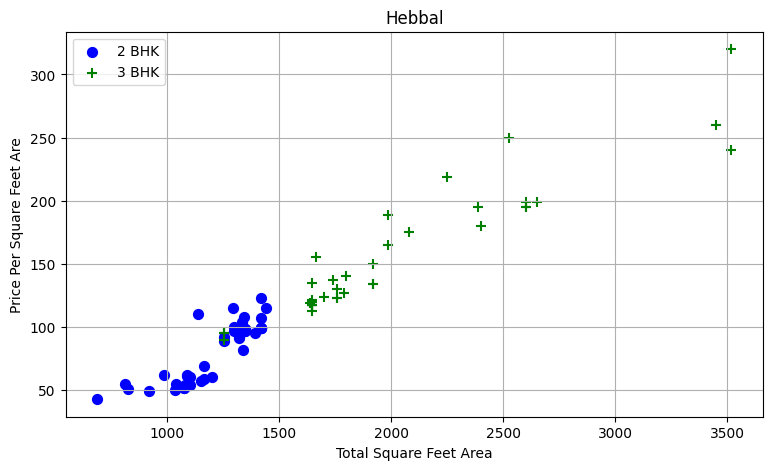

In [62]:
plot_scatter_plot(df8, 'Hebbal')
#we see that some of the outliers have been removed alright

In [63]:
from scipy.stats import norm
rng = np.arange(df8.price_per_sqft.min(), df8.price_per_sqft.max(), 0.1)


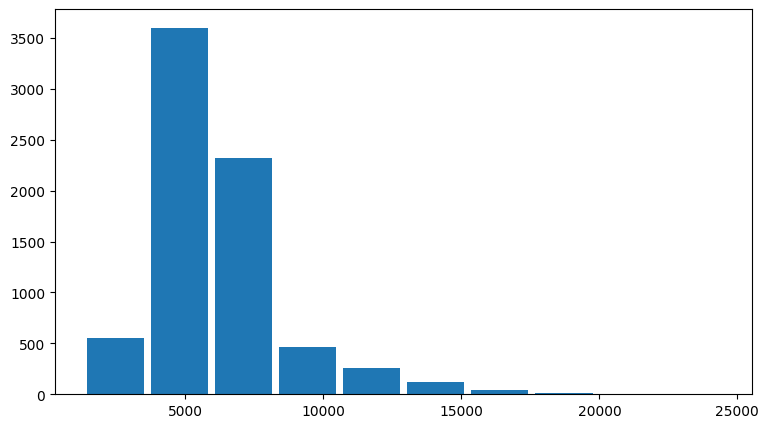

In [64]:
#let's see a histogram of per square feet area

plt.hist(df8.price_per_sqft, rwidth = 0.9, 
         # bins = 20,
         # density = True
        )
# plt.xlabel("Price Per Square Feet")
# plt.ylabel("Count")
plt.show()
#let's see if there is bell curve alright
# plt.plot(rng, norm.pdf(rng, df8.price_per_sqft.mean(), df8.price_per_sqft.std()))

#alright.., i would say this is not really a bell curve like that sha.., don't know.., but doesn't really look like a bell curve to me

In [65]:
#let's get some insight into the bathroom feature of this home alright

df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  9.,  7., 12., 16., 13.])

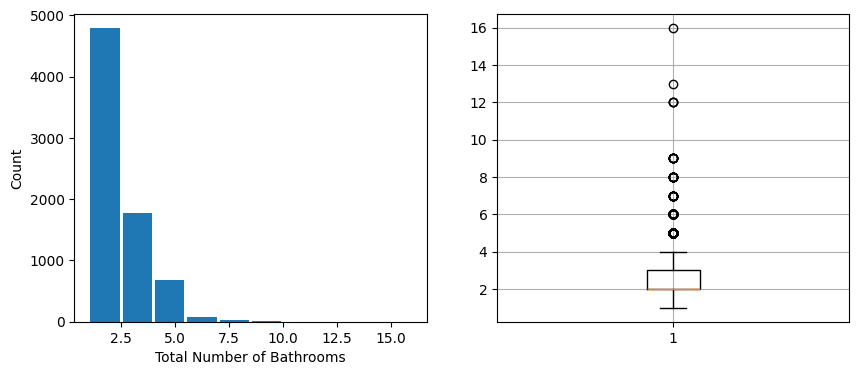

In [66]:
#let's see the histogram distribution of the bathrooms

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(121)
ax1.hist(df8.bath, rwidth = 0.9)
ax1.set(xlabel="Total Number of Bathrooms", ylabel='Count')

ax2 = fig.add_subplot(122)
ax2.boxplot(df8.bath)
ax2.grid()
plt.show()

#it is clear that there are some outliers plenty outliers in this distribution.., above 4, everything is an outlier

In [67]:
df8[df8.bath > df8.bhk + 2]

#these are the outliers we want to remove alright.., all these are outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1639,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5276,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6760,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8468,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [68]:
df9 = df8[~(df8.bath > df8.bhk + 2)]

In [69]:
df9.shape

(7372, 7)

In [70]:
#before we launch into machine learning training and modelling.., we have to drop some unnecessary features
#e.g. size.., already expressed as bhk
#price_per_sqft was for analysis, but we already have a target as price.., so let's do that alright

df10 = df9.drop(columns = {'size', 'price_per_sqft'})

In [71]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


#### MACHINE LEARNING ACTIONS

In [72]:
#let's use one hot encoding to convert the location column to more of a numerical value alright
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [73]:
# le = LabelEncoder()

df11 =  df10.copy(deep = True)

In [74]:
some_values = pd.get_dummies(df11.location, dtype = int)
some_values.drop(columns = {'other'}, inplace = True)

In [75]:
df11.drop(columns = 'location', inplace = True)

In [76]:
# from sklearn.compose import ColumnTransformer

In [77]:
# ct = ColumnTransformer([
#     ('encoder', OneHotEncoder(drop= 'first'),[0])],
#                        remainder= 'passthrough')

In [78]:
# desired_array = ct.fit_transform(df11).toarray()

In [79]:
df12 = pd.concat([df11, some_values], axis = 1)

In [80]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df12.shape

(7372, 245)

In [82]:
X = df12.drop(columns = {'price'})
y = df12.price

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
model.score(X_test, y_test)

#alright.., that's quite a good score considering the fact that my rows are more than his

0.8349581593706621

In [88]:
#something new.., the shuffle split.., let's do that and understand all the intricates of what we are doing alright
from sklearn.model_selection import ShuffleSplit

In [89]:
# cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0) #what 

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [93]:
#alright.., so let's use the ShuffleSplit to get similar kind of results alright

ss = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state= 0)

In [94]:
cross_val_score(LinearRegression(), X, y, cv = ss)

array([0.805372  , 0.84329578, 0.7991961 , 0.82954252, 0.8094715 ])

In [95]:
#alright...., we want to try other models .., Lasso and DecisionTreeRegressor alright

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [96]:
#let's see something very important alright
def select_best_model(X,y):
    models_holder = []
    algos = {
        'linear_model':{
            'model':LinearRegression(),
            'params':{
                'n_jobs':[1,2]}
        },
    
        'Regularisation':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']}
    },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best', 'random']}
    }
    }
    #let's use shuffle splits here instead of just say 5
    cv = ShuffleSplit(n_splits = 5, test_size= 0.2, random_state= 0)
    for a, b in algos.items():
        clf = GridSearchCV(b['model'], b['params'], cv= cv)
        clf.fit(X,y)
        models_holder.append({
            'model': a,
            'best score': clf.best_score_,
            'best_params':clf.best_params_})
        
    return pd.DataFrame(models_holder)


In [97]:
select_best_model(X, y)

,model,best score,best_params
0,linear_model,0.817376,{'n_jobs': 1}
1,Regularisation,0.690435,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.702946,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [98]:
#let's take it to a dataframe and understand all the intricates of what we are trying to do alright
#alright.., this is what we need to know alright.., let's put in our very best

In [99]:
#alright.., let's train our model with n_jobs = 1

model = LinearRegression(n_jobs = 1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 10)

In [101]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [102]:
model.score(X_test, y_test)

0.8349581593706621

In [103]:
#alright.., let's use this as the score is good enough alright

In [104]:
model.score(X_test, y_test)

0.8349581593706621

In [105]:
np.where(X_test.columns == '1st Block Jayanagar')[0][0]

3

In [109]:
#let's define a function to write this code alright

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if loc_index > 0:
        x[loc_index] = 1
    return model.predict([x])[0]

In [114]:
predict_price('Indira Nagar', 1000, 3, 3)

198.11441558973297

In [115]:
#alright.., let's export the model to a pickle file

import pickle

In [116]:
with open('model_house_price', 'wb') as f:
    pickle.dump(model, f)

In [117]:
with open('model_house_price', 'rb') as f:
    my_model = pickle.load(f)

In [118]:
my_model

LinearRegression(n_jobs=1)

In [120]:
#we want to get all the columns in the dataframe because columns is a very important parameter for prediction

columns = {
    'data_columns':[col.lower() for col in X.columns]}

In [123]:
import json

with open("columns.json", "w") as f:
    json.dump(columns, f)